In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('imports-85.data', names = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_doors', 'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 'num_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price'])

In [3]:
df

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    205 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            205 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression_ratio    205 non-null float64
horsepower           205 non-nul

In [5]:
numeric = df[['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']].copy()

In [6]:
numeric.replace('?', np.nan, inplace=True)

In [7]:
numeric = numeric.astype(float)

Since price is our target variable, we'll need to drop all rows that don't have a price.

In [8]:
numeric.dropna(subset=['price'], axis=0, inplace=True)

In [9]:
numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 15 columns):
normalized_losses    164 non-null float64
wheel_base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb_weight          201 non-null float64
engine_size          201 non-null float64
bore                 197 non-null float64
stroke               197 non-null float64
compression_ratio    201 non-null float64
horsepower           199 non-null float64
peak_rpm             199 non-null float64
city_mpg             201 non-null float64
highway_mpg          201 non-null float64
price                201 non-null float64
dtypes: float64(15)
memory usage: 25.1 KB


We still have a few missing values. For now, we'll replace them with column means, but we should refer back to the above table if our analysis seems off. Normalized_losses, for example, is missing almost 20% of its values. If it ends up being important for our analysis, it's worth considering if the column mean is an accurate way of handling the missing data.

In [10]:
numeric.replace(np.nan, numeric.mean(), inplace=True)

In [11]:
numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 15 columns):
normalized_losses    201 non-null float64
wheel_base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb_weight          201 non-null float64
engine_size          201 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    201 non-null float64
horsepower           201 non-null float64
peak_rpm             201 non-null float64
city_mpg             201 non-null float64
highway_mpg          201 non-null float64
price                201 non-null float64
dtypes: float64(15)
memory usage: 25.1 KB


No more missing values! 

In [12]:
numeric.describe()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365602,478.113178,6.423220,6.815150,7947.066342
min,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5117.587940,24.000000,30.000000,10295.000000
75%,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


Our next issue is the differences between scales of our different variables. Peak RPM, for example, ranges from 4150 to 6600, while bore ranges from 2.07 to 4.17. We'll need to normalize our columns in order to make meaningful comparisons in our analysis. For our purposes, simple min-max normalization should work. 

In [13]:
normalized = (numeric - numeric.min()) / (numeric.max() - numeric.min())

In [14]:
normalized['price'] = numeric['price']

In [15]:
normalized

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.12500,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.18750,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.06250,0.313084,0.551020,0.138889,0.157895,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.157068,0.655977,0.711940,0.735043,0.641667,0.567882,0.301887,0.885714,0.514286,0.15625,0.308411,0.510204,0.277778,0.315789,16845.0
201,0.157068,0.655977,0.711940,0.726496,0.641667,0.605508,0.301887,0.885714,0.514286,0.10625,0.523364,0.469388,0.166667,0.236842,19045.0
202,0.157068,0.655977,0.711940,0.735043,0.641667,0.591156,0.422642,0.742857,0.380952,0.11250,0.401869,0.551020,0.138889,0.184211,21485.0
203,0.157068,0.655977,0.711940,0.735043,0.641667,0.670675,0.316981,0.335714,0.633333,1.00000,0.271028,0.265306,0.361111,0.289474,22470.0


Now we can do some modeling. To begin, let's just look at each feature individually.

In [16]:
def univariate_knn(feature_col, target_col, df):
    np.random.seed(1)
    df = df.iloc[np.random.permutation(len(df))]
    halfway_row = int(round((len(df)/2),0))
    train = df.iloc[:halfway_row]
    test = df.iloc[halfway_row:]
    knn = KNeighborsRegressor()
    knn.fit(train[[feature_col]], train[target_col])
    predictions = knn.predict(test[[feature_col]])
    rmse = (mean_squared_error(test[target_col], predictions))**0.5
    return rmse

In [17]:
rmses=pd.Series()

for col in normalized.columns:
    if col != 'price':
        rmse = univariate_knn(col, 'price', normalized)
        rmses[col] = rmse

In [18]:
rmses.sort_values()

engine_size          3238.462830
horsepower           4037.037713
curb_weight          4401.118255
highway_mpg          4630.026799
width                4704.482590
city_mpg             4766.422505
length               5427.200961
wheel_base           5461.553998
compression_ratio    6610.812153
bore                 6780.627785
normalized_losses    7330.197653
peak_rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

Using the default (5 neighbors) for a k-nearest neighbor model, we found that engine_size returned the smallest rmse (error). This was followed by horsepower and curb weight. Height, stroke, and peak RPM were the least predictive using this model. But what about at other k values? Does changing this hyperparameter result in different features becoming more predictive?

In [19]:
def univariate_knn_choose_k(feature_col, target_col, df, k):
    np.random.seed(1)
    df = df.iloc[np.random.permutation(len(df))]
    halfway_row = int(round((len(df)/2),0))
    train = df.iloc[:halfway_row]
    test = df.iloc[halfway_row:]
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train[[feature_col]], train[target_col])
    predictions = knn.predict(test[[feature_col]])
    rmse = (mean_squared_error(test[target_col], predictions))**0.5
    return rmse

In [20]:
errors = pd.DataFrame()
features = []
neighbors = []
rmses_list = []
for k in range(1,31):
    for col in normalized.columns:
        if col != 'price':
            rmse = univariate_knn_choose_k(col, 'price', normalized, k)
            features.append(col)
            neighbors.append(k)
            rmses_list.append(rmse)

In [21]:
errors['feature'] = features
errors['neighbors'] = neighbors
errors['rmse'] = rmses_list

In [22]:
errors.sort_values(['rmse']).head(20)

,feature,neighbors,rmse
34,engine_size,3,2840.562806
20,engine_size,2,2961.402094
48,engine_size,4,3138.595303
62,engine_size,5,3238.462830
6,engine_size,1,3258.486106
76,engine_size,6,3443.540179
90,engine_size,7,3563.086774
104,engine_size,8,3670.755243
24,horsepower,2,3803.239548
118,engine_size,9,3831.824415


Once again, engine size appears to be our best predictor, followed by horsepower and perhaps curb weight. Optimal k values range from 1 to 12. 

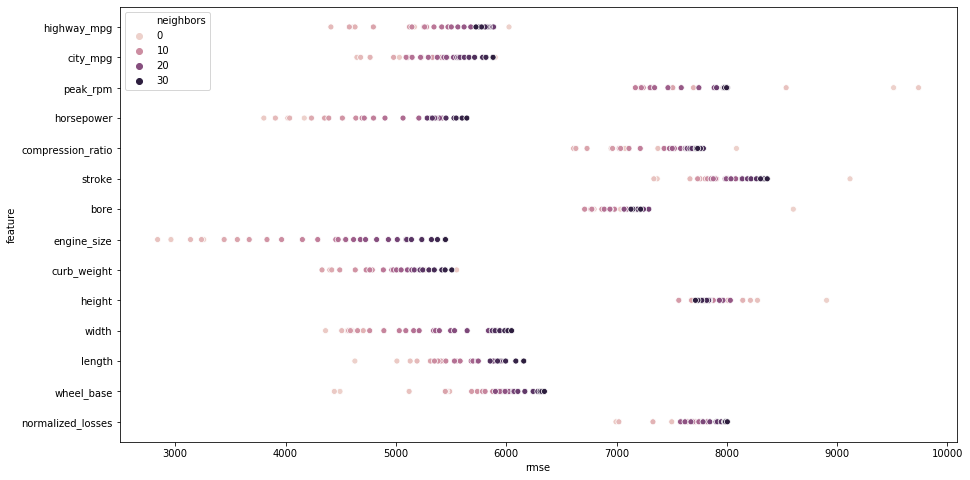

In [23]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='rmse', y='feature', hue = 'neighbors', data=errors)

Looking at the scatterplot, we see there is a noticeable difference between our potential features. Highway MPG, city MPG, horsepower, engine size, curb weight, width, length, and wheel base all seem like good predictors, while the rest have relatively higher rmses. With all our good predictors, we see a general trend of increasing k-values leading to higher error. We'll want to look at values between 1 and 10. What's the plot look like for just our good predictors with ks between 1 and 15?

In [24]:
predictors= ['highway_mpg', 'city_mpg', 'horsepower', 'engine_size', 'curb_weight', 'width', 'length', 'wheel_base']

In [25]:
errors_edited = errors[errors['feature'].isin(predictors)]
errors_edited = errors_edited[errors_edited['neighbors']<=10]

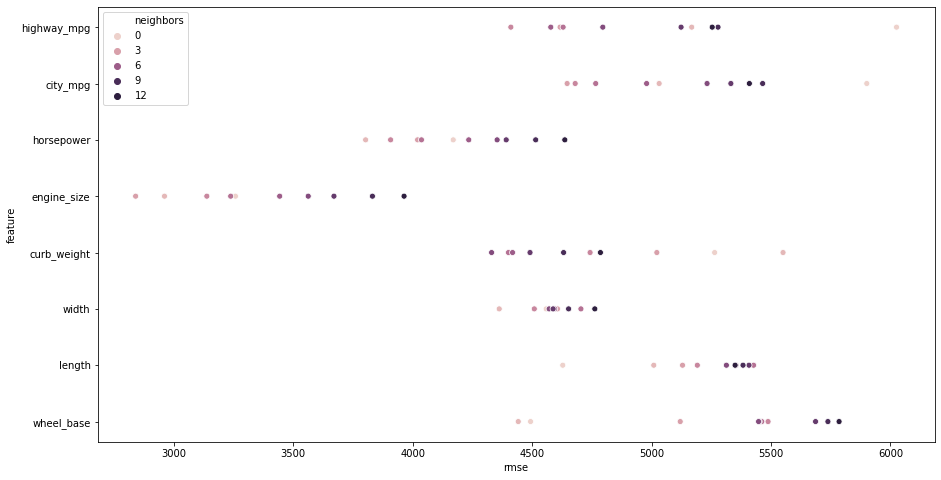

In [26]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='rmse', y='feature', hue='neighbors', data=errors_edited)

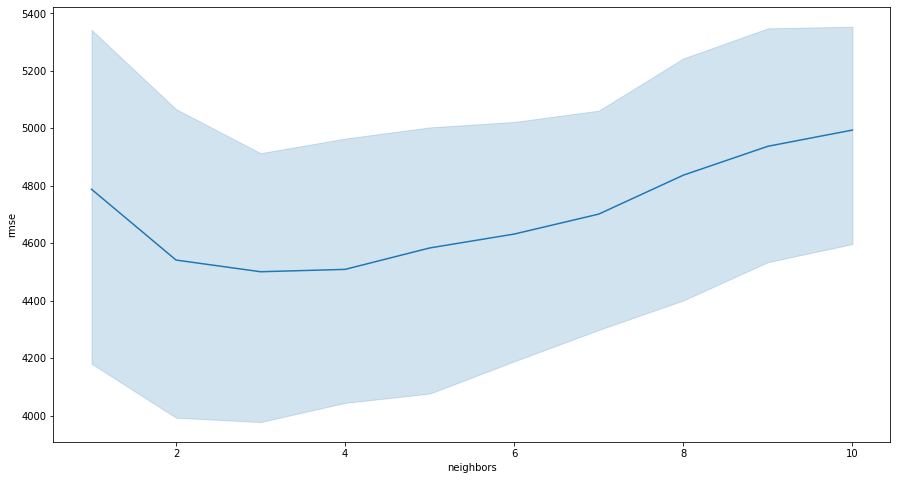

In [27]:
plt.figure(figsize=(15,8))
sns.lineplot(y='rmse', x='neighbors', data=errors_edited)

From this chart, we can tell our optimum k value will likely lie between 2 and 7. Let's do some multivariate analysis now that we know which features work.

In [28]:
def multivariate_knn(feature_cols_list, target_col, df):
    np.random.seed(1)
    df = df.iloc[np.random.permutation(len(df))]
    halfway_row = int(round((len(df)/2),0))
    train = df.iloc[:halfway_row]
    test = df.iloc[halfway_row:]
    knn = KNeighborsRegressor()
    knn.fit(train[feature_cols_list], train[target_col])
    predictions = knn.predict(test[feature_cols_list])
    rmse = (mean_squared_error(test[target_col], predictions))**0.5
    return rmse

In [29]:
best_to_worst_features = errors.groupby('feature').mean()['rmse'].sort_values().index.tolist()

In [30]:
rmses2=pd.Series()

for i in range(2,15):
    features = best_to_worst_features[:i]
    rmse = multivariate_knn(features, 'price', normalized)
    rmses2[str(i)+ ' best variables'] = rmse 

In [31]:
print('mutivariate knn w/ k=5:')
rmses2.sort_values()

mutivariate knn w/ k=5:


2 best variables     2949.881728
7 best variables     3359.944489
5 best variables     3360.832156
6 best variables     3416.536073
3 best variables     3435.260110
4 best variables     3487.340917
9 best variables     3563.434873
8 best variables     3647.155383
12 best variables    3695.575870
14 best variables    3726.637718
11 best variables    3736.793393
13 best variables    3744.804473
10 best variables    3759.830984
dtype: float64

In [32]:
print('univariate rmses:')
rmses.sort_values()

univariate rmses:


engine_size          3238.462830
horsepower           4037.037713
curb_weight          4401.118255
highway_mpg          4630.026799
width                4704.482590
city_mpg             4766.422505
length               5427.200961
wheel_base           5461.553998
compression_ratio    6610.812153
bore                 6780.627785
normalized_losses    7330.197653
peak_rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

Comparing our multivariate analyses to our univariate, we find that only the 2-variable model beats just using engine size as our predictor. But what if we vary our k-value?

In [33]:
def multivariate_knn_choose_k(feature_cols_list, target_col, df, k):
    np.random.seed(1)
    df = df.iloc[np.random.permutation(len(df))]
    halfway_row = int(round((len(df)/2),0))
    train = df.iloc[:halfway_row]
    test = df.iloc[halfway_row:]
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train[feature_cols_list], train[target_col])
    predictions = knn.predict(test[feature_cols_list])
    rmse = (mean_squared_error(test[target_col], predictions))**0.5
    return rmse

In [34]:
errors2 = pd.DataFrame()
features2 = []
neighbors2 = []
rmses_list2 = []
for k in range(2,11):
    for i in range (2,11):
        feature_cols = best_to_worst_features[:i]
        rmse = multivariate_knn_choose_k(feature_cols, 'price', normalized, k)
        features2.append(feature_cols)
        neighbors2.append(k)
        rmses_list2.append(rmse)

In [36]:
errors2['features'] = features2
errors2['num_neighbors'] = neighbors2
errors2['rmse'] = rmses_list2

In [37]:
errors2.sort_values('rmse')

,features,num_neighbors,rmse
0,"[engine_size, horsepower]",2,2657.796381
9,"[engine_size, horsepower]",3,2792.586573
4,"[engine_size, horsepower, curb_weight, width, ...",2,2814.672472
3,"[engine_size, horsepower, curb_weight, width, ...",2,2878.338820
14,"[engine_size, horsepower, curb_weight, width, ...",3,2888.723666
...,...,...,...
70,"[engine_size, horsepower, curb_weight, width, ...",9,4202.527496
79,"[engine_size, horsepower, curb_weight, width, ...",10,4248.685505
78,"[engine_size, horsepower, curb_weight, width, ...",10,4328.274757
71,"[engine_size, horsepower, curb_weight, width, ...",9,4385.764373


Our two best performing models use only engine size and horsepower as their predictors, and our top five models have either 2 or 3 as their k-value. 